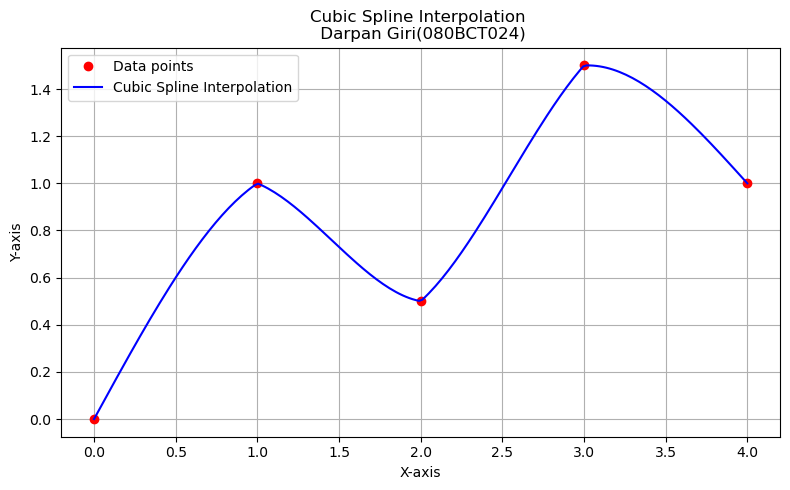

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline_interpolation(X, Y, xp):
    n = len(X) - 1
    h = np.diff(X)

    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i - 1] = (3 / h[i]) * (Y[i + 1] - Y[i]) - (3 / h[i - 1]) * (Y[i] - Y[i - 1])

    A = np.zeros((n - 1, n - 1))
    for i in range(n - 1):
        if i > 0:
            A[i, i - 1] = h[i]
        A[i, i] = 2 * (h[i] + h[i + 1])
        if i < n - 2:
            A[i, i + 1] = h[i + 1]

    M = np.zeros(n + 1)
    if n > 1:
        M[1:n] = np.linalg.solve(A, alpha)

    def find_interval(xp_val):
        return np.clip(np.searchsorted(X, xp_val) - 1, 0, n - 1)

    def spline_eval(xp_val):
        i = find_interval(xp_val)
        xi, xi1 = X[i], X[i + 1]
        hi = h[i]
        yi, yi1 = Y[i], Y[i + 1]
        Mi, Mi1 = M[i], M[i + 1]

        term1 = Mi1 * (xp_val - xi) ** 3 / (6 * hi)
        term2 = Mi * (xi1 - xp_val) ** 3 / (6 * hi)
        term3 = (yi1 / hi - Mi1 * hi / 6) * (xp_val - xi)
        term4 = (yi / hi - Mi * hi / 6) * (xi1 - xp_val)

        return term1 + term2 + term3 + term4

    if np.isscalar(xp):
        yp = spline_eval(xp)
    else:
        yp = np.array([spline_eval(x) for x in xp])

    return yp, M


X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 1, 0.5, 1.5, 1])


xp = np.linspace(min(X), max(X), 200)
yp, M = cubic_spline_interpolation(X, Y, xp)


plt.figure(figsize=(8, 5))
plt.plot(X, Y, 'o', label='Data points', color='red')
plt.plot(xp, yp, '-', label='Cubic Spline Interpolation', color='blue')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Cubic Spline Interpolation \n Darpan Giri(080BCT024)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


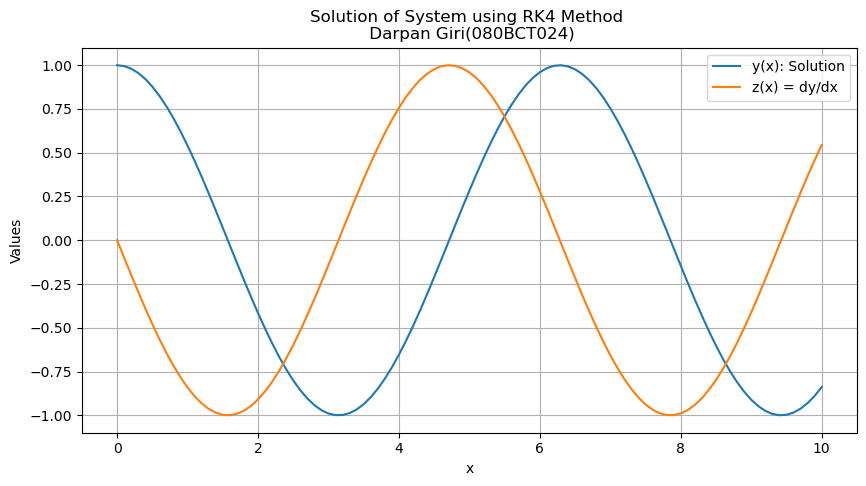

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, y, z):
    return z  
def g(x, y, z):
    return -y  
x0 = 0
y0 = 1  
z0 = 0  
h = 0.1
x_end = 10
n = int((x_end - x0) / h) + 1
x = np.linspace(x0, x_end, n)
y = np.zeros(n)
z = np.zeros(n)
y[0] = y0
z[0] = z0
for i in range(n - 1):
    k1 = h * f(x[i], y[i], z[i])
    l1 = h * g(x[i], y[i], z[i])
    k2 = h * f(x[i] + h/2, y[i] + k1/2, z[i] + l1/2)
    l2 = h * g(x[i] + h/2, y[i] + k1/2, z[i] + l1/2)
    k3 = h * f(x[i] + h/2, y[i] + k2/2, z[i] + l2/2)
    l3 = h * g(x[i] + h/2, y[i] + k2/2, z[i] + l2/2)
    k4 = h * f(x[i] + h, y[i] + k3, z[i] + l3)
    l4 = h * g(x[i] + h, y[i] + k3, z[i] + l3)
    y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    z[i+1] = z[i] + (l1 + 2*l2 + 2*l3 + l4) / 6
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='y(x): Solution')
plt.plot(x, z, label="z(x) = dy/dx")
plt.title("Solution of System using RK4 Method \n Darpan Giri(080BCT024)")
plt.xlabel("x")
plt.ylabel("Values")
plt.grid(True)
plt.legend()
plt.show()

Gauss Jordan Method

In [1]:
import numpy as np

def gauss_jordan(a, b):
   
    n = len(b)
    aug = np.hstack((a.astype(float), b.reshape(-1,1).astype(float)))
    
    for i in range(n):
        
        factor = aug[i][i]
        aug[i] = aug[i] / factor
        
       
        for j in range(n):
            if i != j:
                factor = aug[j][i]
                aug[j] = aug[j] - factor * aug[i]

    
    x = aug[:, -1]
    return x


A = np.array([
    [0.02, 5.52, 2.02],
    [8.05, 9.52, 5.96],
    [7.89, 3.56, 2.04]
])

B = np.array([0.98, 20.64, 10.35])

solution = gauss_jordan(A, B)
print("Solution:")
for i, val in enumerate(solution):
    print(f"x{i+1}={val:.4f}")

Solution:
x1=0.7424
x2=-1.7462
x3=5.2497


In [2]:
import numpy as np

def gauss_jordan(a, b):
    n = len(b)
    aug = np.hstack((a.astype(float), b.reshape(-1, 1).astype(float)))

    for i in range(n):    
        for j in range(n):
            if i != j:
                factor = aug[j][i] / aug[i][i]
                aug[j] = aug[j] - factor * aug[i]
    x = np.zeros(n)
    for i in range(n):
        x[i] = aug[i][-1] / aug[i][i]

    return x
A = np.array([
    [0.02, 5.52, 2.02],
    [8.05, 9.52, 5.96],
    [7.89, 3.56, 2.04]
])
B = np.array([0.98, 20.64, 10.35])

solution = gauss_jordan(A, B)
print("Solution:")
for i, val in enumerate(solution):
    print(f"x{i+1} = {val:.4f}")


Solution:
x1 = 0.7424
x2 = -1.7462
x3 = 5.2497


Gauss Elimination Method

In [ ]:
import numpy as np

def gauss_elimination(a, b):
    n = len(b)
    
    aug = np.hstack((a.astype(float), b.reshape(-1, 1).astype(float)))
    
    
    for i in range(n):
        for j in range(i+1, n):
            factor = aug[j][i] / aug[i][i]
            aug[j] = aug[j] - factor * aug[i]
    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        sum_ax = np.dot(aug[i, i+1:n], x[i+1:n])
        x[i] = (aug[i, -1] - sum_ax) / aug[i][i]
    return x

A = np.array([
    [0.02, 5.52, 2.02],
    [8.05, 9.52, 5.96],
    [7.89, 3.56, 2.04]
])

B = np.array([0.98, 20.64, 10.35])
solution = gauss_elimination(A, B)
print("Solution:")
for i, val in enumerate(solution):
    print(f"x{i+1} = {val:.4f}")


Solution:
x1 = 0.7424
x2 = -1.7462
x3 = 5.2497
